In [6]:
import os
dataset_path = r"C:\Users\mvnik\OneDrive\Desktop\Dataset_BUSI_with_GT"
classes = os.listdir(dataset_path)
print("Classes:", classes)


Classes: ['benign', 'malignant', 'normal']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_path = r"C:\Users\mvnik\OneDrive\Desktop\Dataset_BUSI_with_GT"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1263 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


Loading images...


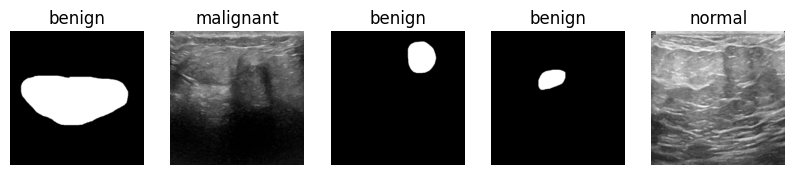

In [10]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
dataset_path = r"C:\Users\mvnik\OneDrive\Desktop\Dataset_BUSI_with_GT"
image_size = (224, 224)  
classes = ['benign', 'malignant', 'normal']  
images = []
labels = []
print("Loading images...")
for label, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        try:
            img = Image.open(file_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {file_name}: {e}")
images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images.")
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")
def visualize_samples(images, labels, classes, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

visualize_samples(X_train, y_train, classes)
